## Projet Databeez : Profile data science
## Groupe VI 53 :
  #### DABGO Ariane
  #### MOUHICHIMIWA Issouf


## Credit Risk

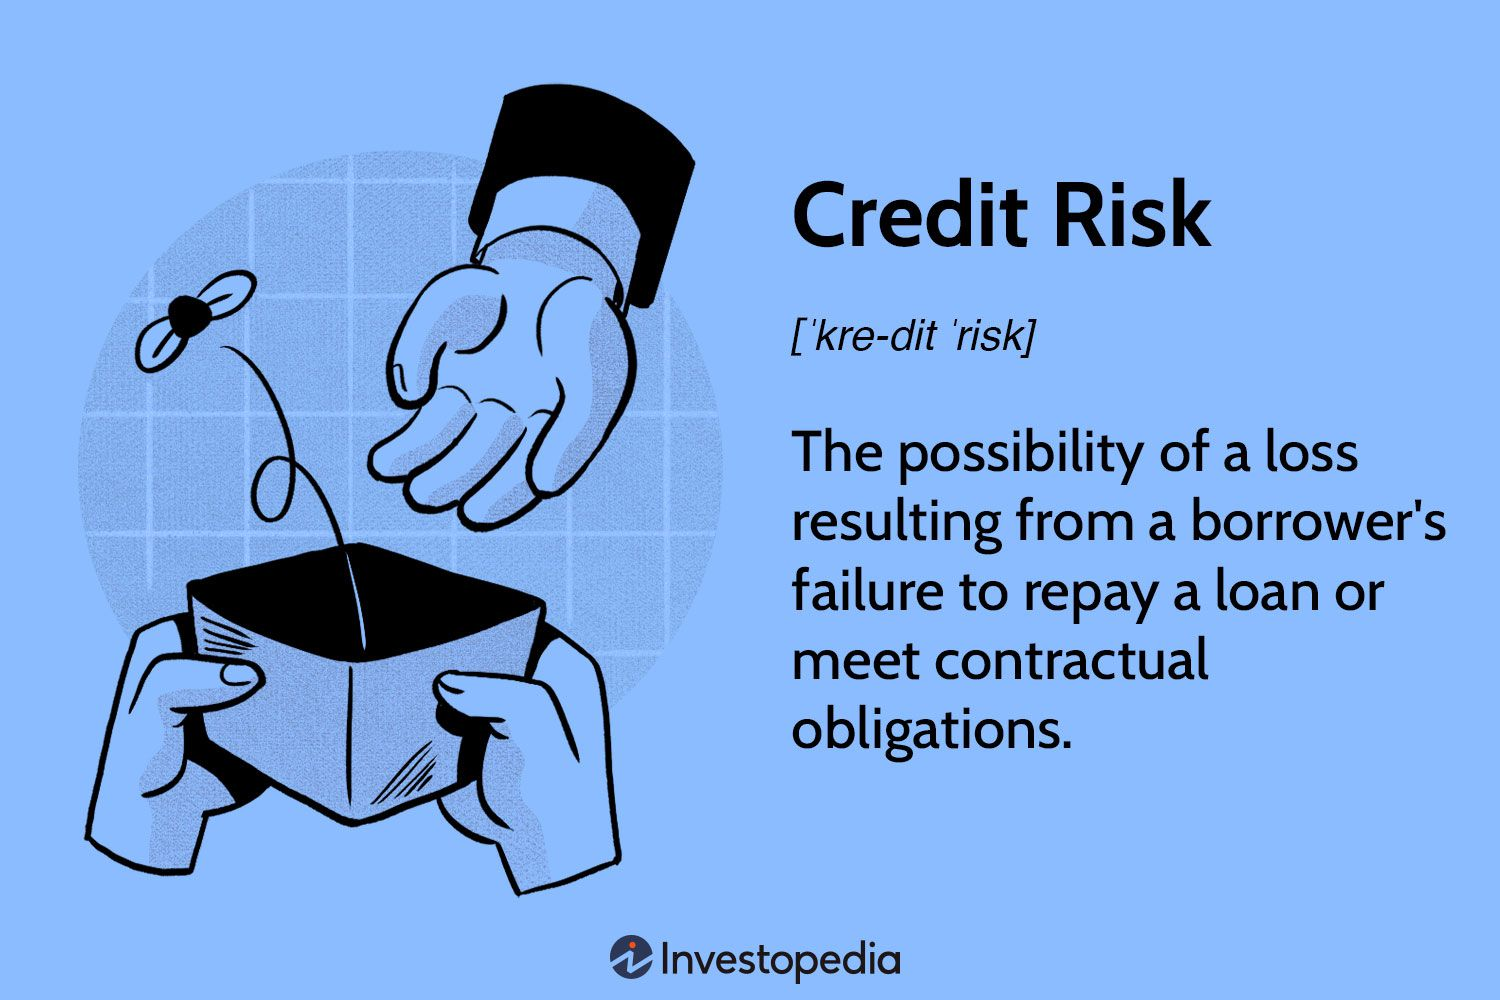

# Présentation du dataset

L'ensemble de données contient 1000 entrées représentant des personnes demandant un crédit bancaire. Chaque entrée décrie les caractéristiques liées à la personne ou à sa demande de crédit. Chaque personne est classée en deux catégories : bon risque ou mauvais risque de crédit, selon ces attributs.

1.  **Age** :(désigne l'âge du contractant)
2.   **Sex**:(désigne le sexe du contractant: masculin, féminin)
3.   **Job**: (numérique : 0 - non qualifié et non-résident, 1 - non qualifié et résident, 2 - qualifié, 3 - hautement qualifié)
4.   **Housing** : (texte : propriétaire, loué ou gratuit)
5.    **Saving accounts**:(désigne l'état du compte d'épargne - petit, modéré, assez riche, riche)
6.    **Checking account**:( désigne l'état du compte courant - petit, modéré, riche)
7.    **Credit amount**: (désigne le montant du crédit en DM - Deutsch Mark)
8.    **Duration**: (La durée pour le remboursement du crédit)
9.    **Purpose**: Le projet derrière de volonté de contracter le prêt.
10.     **Risk**: La target; indique si le risque de crédit est bon ou mauvais








Lien vers le dataset:
[https://www.kaggle.com/code/mathchi/credit-risk-evaluation](https://www.kaggle.com/code/mathchi/credit-risk-evaluation)

# Pipeline

# Import du dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("german_credit_data.csv")
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

# Analyse exploratoire du dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df.count()

Unnamed: 0          1000
Age                 1000
Sex                 1000
Job                 1000
Housing             1000
Saving accounts      817
Checking account     606
Credit amount       1000
Duration            1000
Purpose             1000
Risk                1000
dtype: int64

In [ ]:
df.shape

(1000, 11)

In [ ]:
df.describe()

Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

Nombre d'itérations par catégorie :
  Category  Counts
0     good     700
1      bad     300


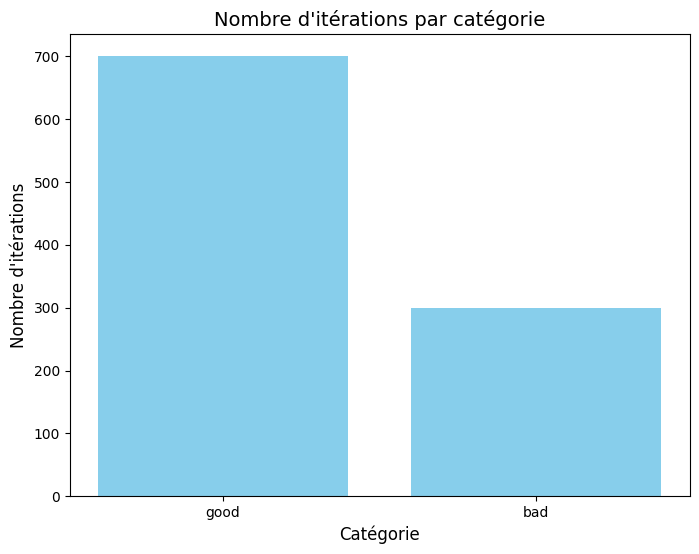

In [ ]:

# Calcul du nombre d'itérations (fréquence) par catégorie
risk_counts = df['Risk'].value_counts().reset_index()
risk_counts.columns = ['Category', 'Counts']

# Affichage des résultats
print("Nombre d'itérations par catégorie :")
print(risk_counts)

# Visualisation
plt.figure(figsize=(8, 6))
plt.bar(risk_counts['Category'], risk_counts['Counts'], color='skyblue')
plt.title('Nombre d\'itérations par catégorie', fontsize=14)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre d\'itérations', fontsize=12)
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
# Suppression d'une colonne nommée "nom_de_la_colonne"
df = df.drop(columns=['Unnamed: 0'])

#### Risque en fonction du sexe

In [ ]:
 df['Sex'].value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

Nombre de risques par sexe :
Risk    bad  good
Sex              
female  109   201
male    191   499


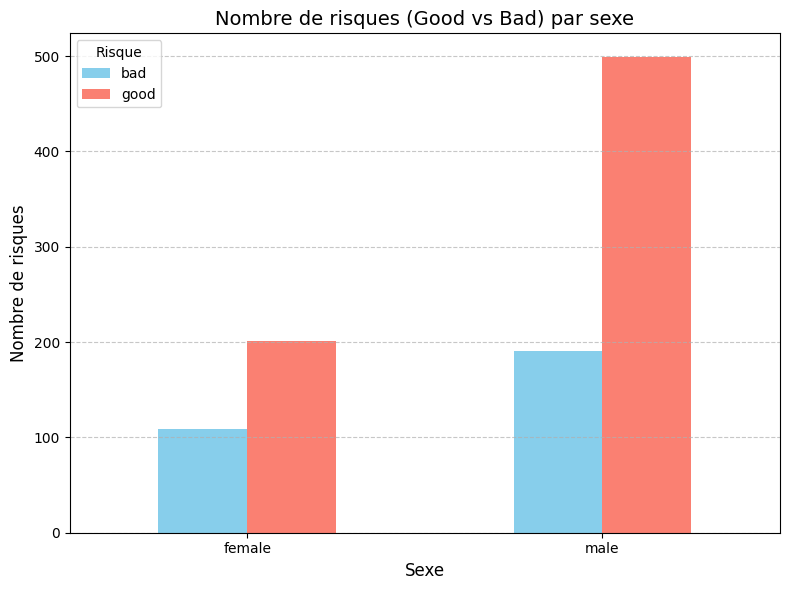

In [ ]:

# Calcul du nombre de risques par sexe
risk_by_sex = df.groupby(['Sex', 'Risk']).size().unstack(fill_value=0)

# Affichage des résultats
print("Nombre de risques par sexe :")
print(risk_by_sex)

# Visualisation : Barres côte à côte
risk_by_sex.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])

# Personnalisation du graphique
plt.title('Nombre de risques (Good vs Bad) par sexe', fontsize=14)
plt.xlabel('Sexe', fontsize=12)
plt.ylabel('Nombre de risques', fontsize=12)
plt.legend(title="Risque", fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

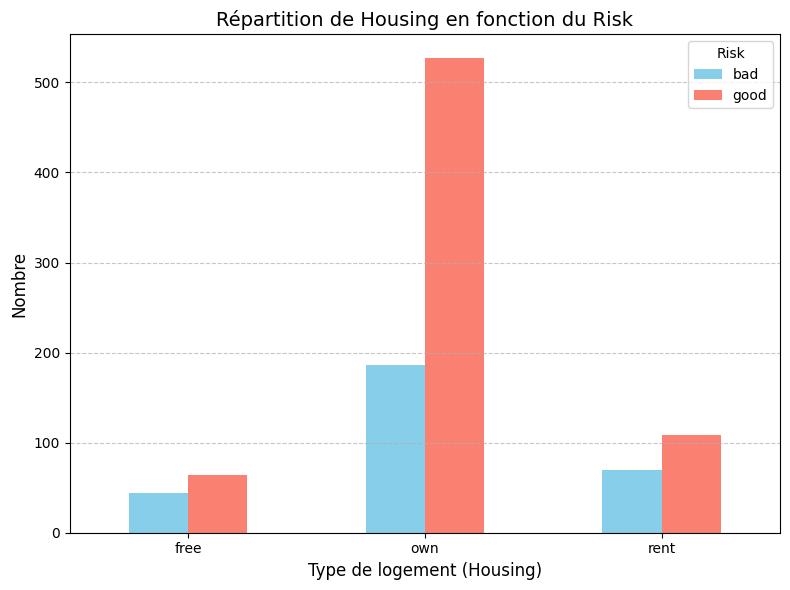

In [ ]:
# Comptage des combinaisons Housing et Risk
housing_risk_counts = df.groupby(['Housing', 'Risk']).size().unstack(fill_value=0)

# Visualisation avec un diagramme en barres groupées
housing_risk_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])

# Personnalisation
plt.title('Répartition de Housing en fonction du Risk', fontsize=14)
plt.xlabel('Type de logement (Housing)', fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Risk', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()

####

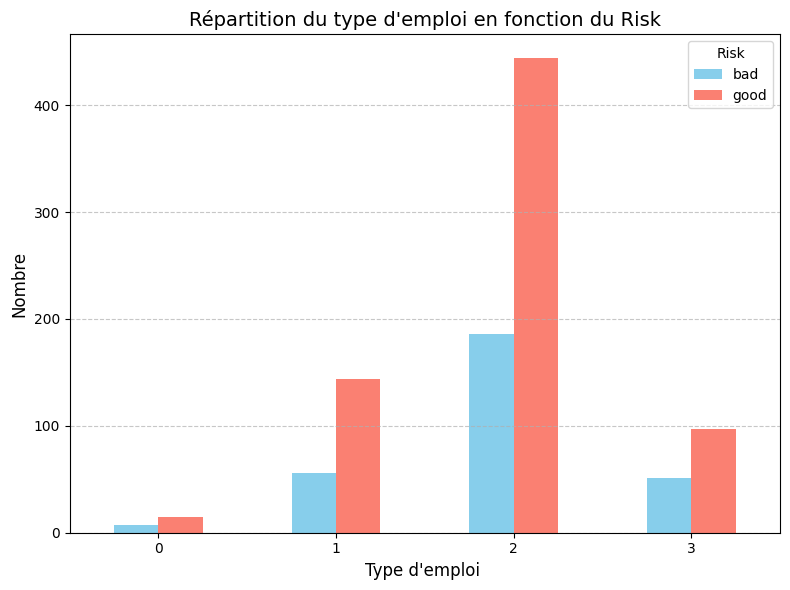

In [ ]:
# Comptage des combinaisons Housing et Risk
housing_risk_counts = df.groupby(['Job', 'Risk']).size().unstack(fill_value=0)

# Visualisation avec un diagramme en barres groupées
housing_risk_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])

# Personnalisation
plt.title("Répartition du type d'emploi en fonction du Risk", fontsize=14)
plt.xlabel("Type d'emploi ", fontsize=12)
plt.ylabel('Nombre', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Risk', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()

<ipython-input-15-b044f80cb123>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job', y='Credit amount', data=df, palette='Set2')


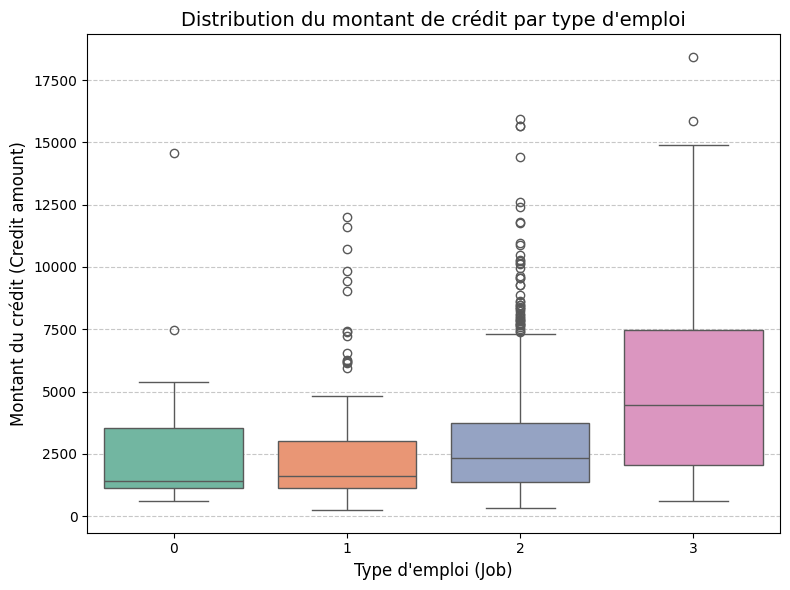

In [ ]:
# Boxplot pour visualiser la distribution des montants de crédit par type d'emploi
plt.figure(figsize=(8, 6))
sns.boxplot(x='Job', y='Credit amount', data=df, palette='Set2')

# Personnalisation
plt.title("Distribution du montant de crédit par type d'emploi", fontsize=14)
plt.xlabel('Type d\'emploi (Job)', fontsize=12)
plt.ylabel('Montant du crédit (Credit amount)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()


<ipython-input-16-f62a0b6ff6ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y='Duration', data=df, palette='Set2')


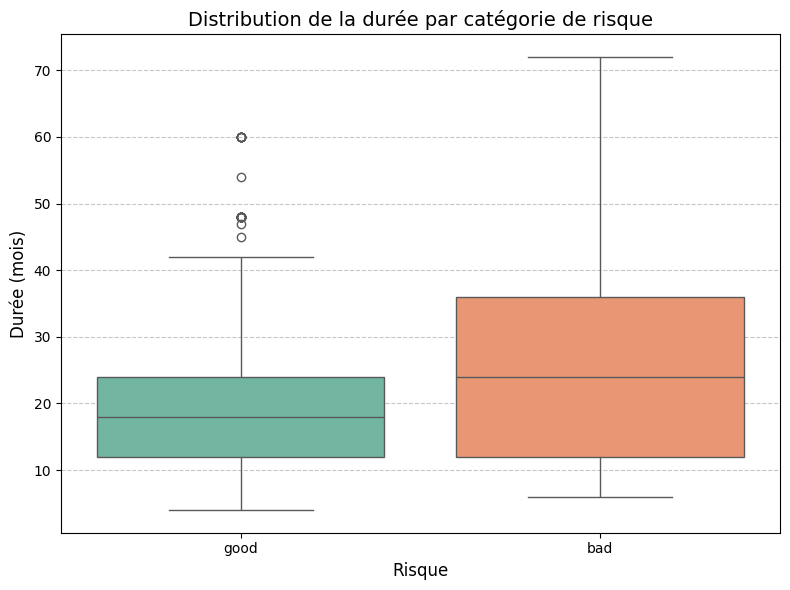

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Duration', data=df, palette='Set2')

# Personnalisation
plt.title("Distribution de la durée par catégorie de risque", fontsize=14)
plt.xlabel('Risque', fontsize=12)
plt.ylabel('Durée (mois)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()

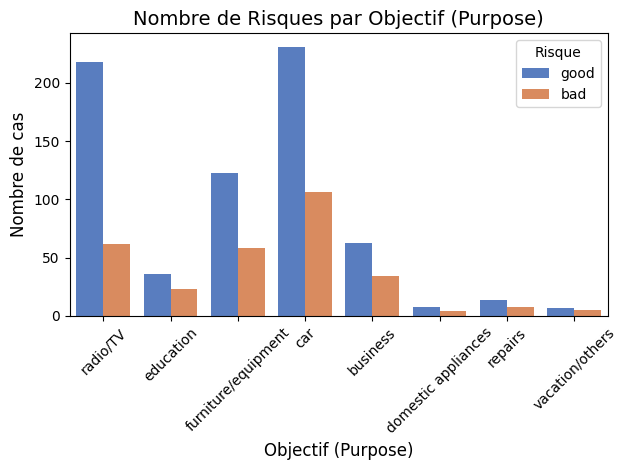

In [ ]:
sns.countplot(x='Purpose', hue='Risk', data=df, palette="muted")

# Personnalisation
plt.title('Nombre de Risques par Objectif (Purpose)', fontsize=14)
plt.xlabel('Objectif (Purpose)', fontsize=12)
plt.ylabel('Nombre de cas', fontsize=12)
plt.xticks(rotation=45)  # Rotation pour une meilleure lisibilité
plt.legend(title='Risque')
plt.tight_layout()

# Affichage
plt.show()

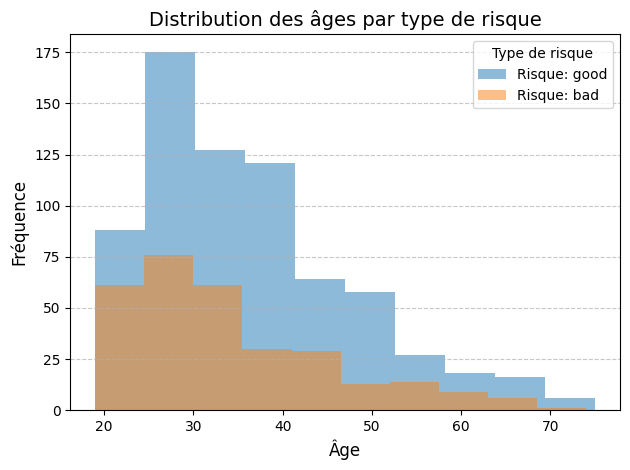

In [ ]:
for risk_level in df['Risk'].unique():
    subset = df[df['Risk'] == risk_level]
    plt.hist(subset['Age'], bins=10, alpha=0.5, label=f'Risque: {risk_level}')

# Personnalisation
plt.title('Distribution des âges par type de risque', fontsize=14)
plt.xlabel('Âge', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend(title='Type de risque')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Affichage
plt.show()

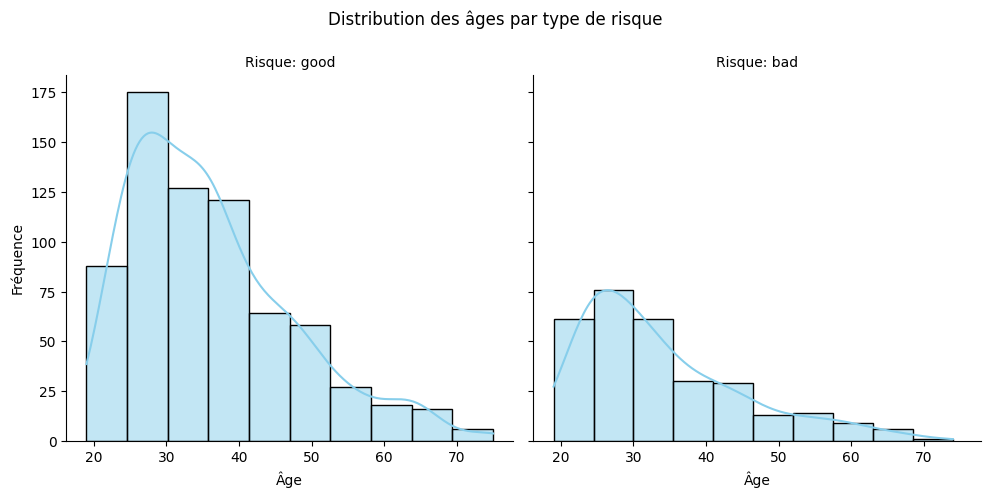

In [ ]:
g = sns.FacetGrid(df, col='Risk', height=5, aspect=1)
g.map(sns.histplot, 'Age', kde=True, bins=10, color='skyblue')

# Personnalisation
g.set_titles('Risque: {col_name}')
g.set_axis_labels('Âge', 'Fréquence')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution des âges par type de risque')

# Affichage
plt.show()

<ipython-input-20-f62a0b6ff6ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Risk', y='Duration', data=df, palette='Set2')


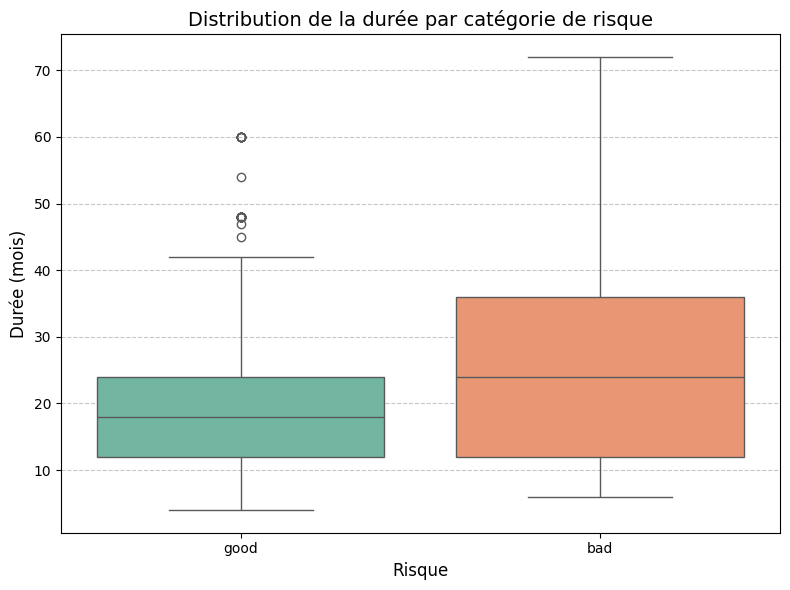

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Risk', y='Duration', data=df, palette='Set2')

# Personnalisation
plt.title("Distribution de la durée par catégorie de risque", fontsize=14)
plt.xlabel('Risque', fontsize=12)
plt.ylabel('Durée (mois)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()

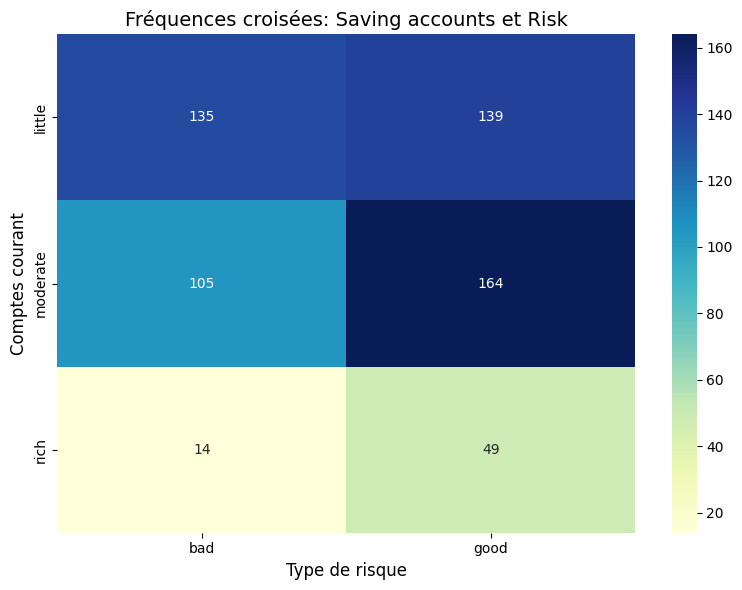

In [ ]:
# Calcul du tableau de contingence
pivot_table = pd.crosstab(df['Checking account'], df['Risk'])

# Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

# Personnalisation
plt.title('Fréquences croisées: Saving accounts et Risk', fontsize=14)
plt.xlabel('Type de risque', fontsize=12)
plt.ylabel('Comptes courant', fontsize=12)
plt.tight_layout()

# Affichage
plt.show()

Nombre de risques par compte courant :
Risk              bad  good
Checking account           
little            135   139
moderate          105   164
rich               14    49


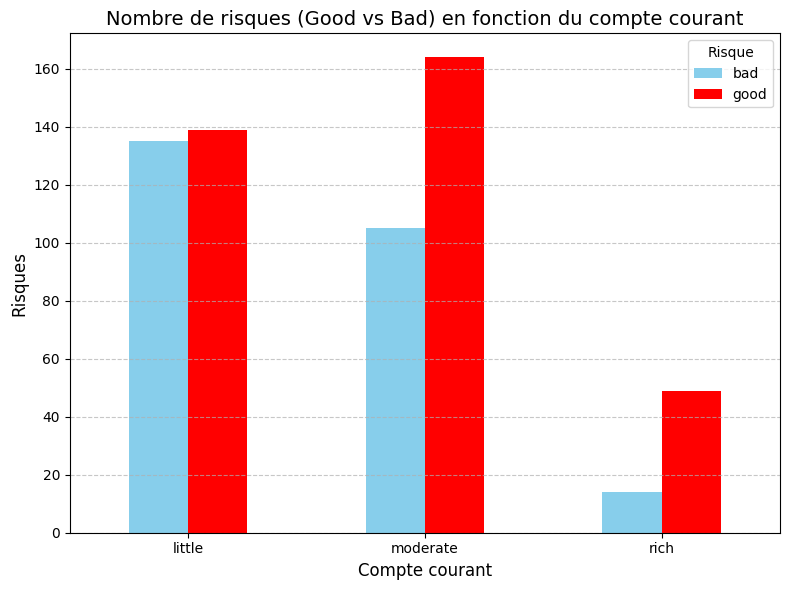

In [ ]:

# Calcul du nombre de risques par sexe
risk_by_checking = df.groupby(['Checking account', 'Risk']).size().unstack(fill_value=0)

# Affichage des résultats
print("Nombre de risques par compte courant :")
print(risk_by_checking )

# Visualisation : Barres côte à côte
risk_by_checking .plot(kind='bar', figsize=(8, 6), color=['skyblue', 'red'])

# Personnalisation du graphique
plt.title('Nombre de risques (Good vs Bad) en fonction du compte courant', fontsize=14)
plt.xlabel('Compte courant', fontsize=12)
plt.ylabel('Risques', fontsize=12)
plt.legend(title="Risque", fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

Nombre de risques par compte courant :
Risk             bad  good
Saving accounts           
little           217   386
moderate          34    69
quite rich        11    52
rich               6    42


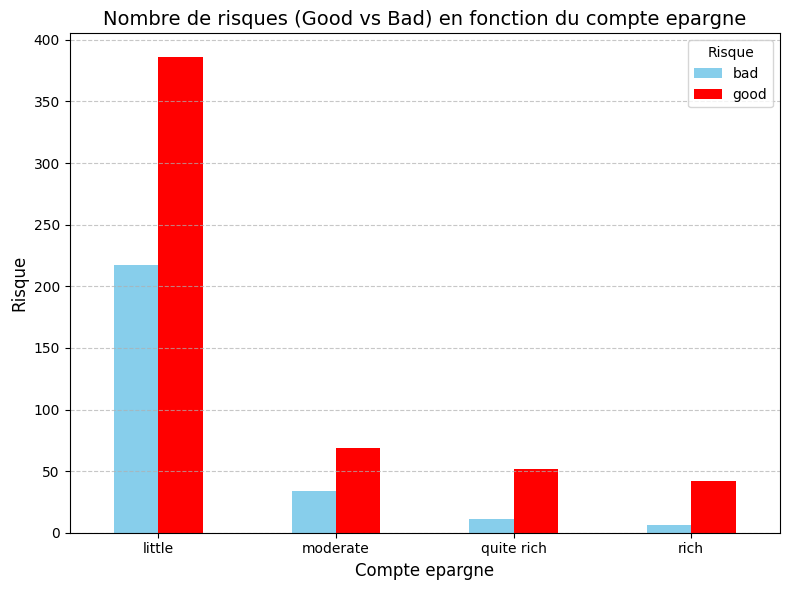

In [ ]:

# Calcul du nombre de risques par sexe
risk_by_saving = df.groupby(['Saving accounts', 'Risk']).size().unstack(fill_value=0)

# Affichage des résultats
print("Nombre de risques par compte courant :")
print(risk_by_saving)

# Visualisation : Barres côte à côte
risk_by_saving .plot(kind='bar', figsize=(8, 6), color=['skyblue', 'red'])

# Personnalisation du graphique
plt.title('Nombre de risques (Good vs Bad) en fonction du compte epargne', fontsize=14)
plt.xlabel('Compte epargne', fontsize=12)
plt.ylabel('Risque', fontsize=12)
plt.legend(title="Risque", fontsize=10)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.tight_layout()
plt.show()

## Prétraitement

In [ ]:
df.head()


Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [ ]:
# Remplacement par la catégorie la plus fréquente
mode_val = df['Checking account'].mode()[0]
df['Checking account'] = df['Checking account'].fillna(mode_val)


In [ ]:
# Remplacement par la catégorie la plus fréquente
mode_val = df['Saving accounts'].mode()[0]
df['Saving accounts'] = df['Saving accounts'].fillna(mode_val)


In [ ]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own          little           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little           little           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
 9   Risk              1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB
None


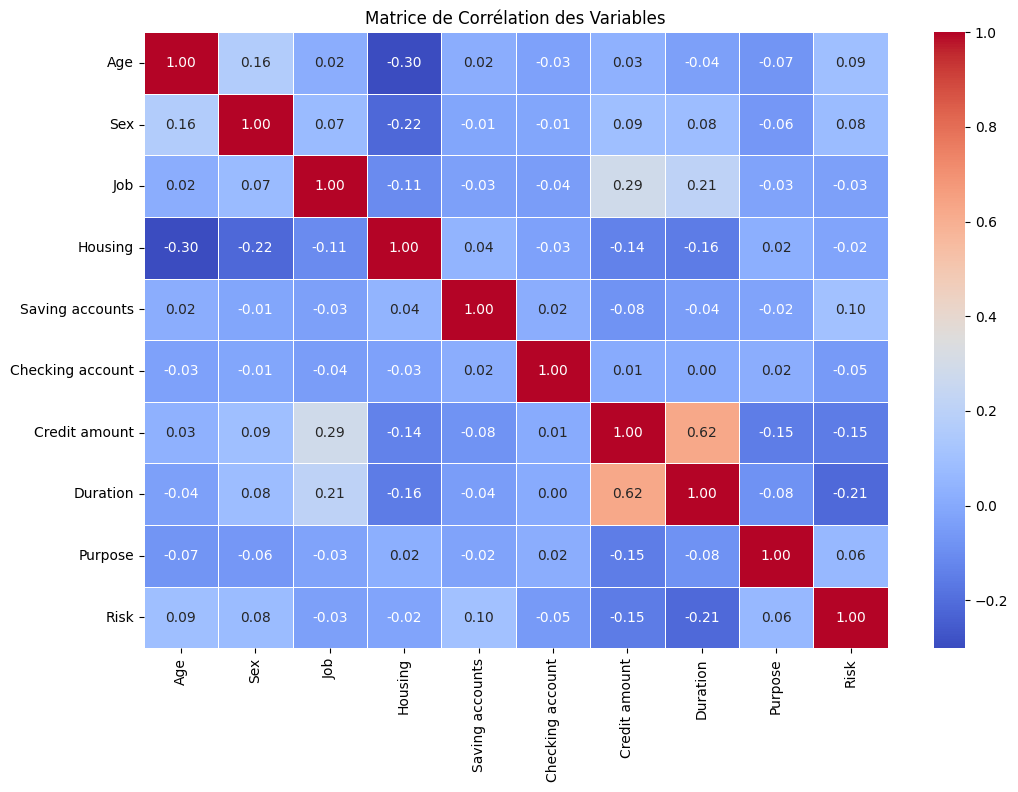

Risk                1.000000
Saving accounts     0.102751
Age                 0.091127
Sex                 0.075493
Purpose             0.061145
Housing            -0.019315
Job                -0.032735
Checking account   -0.052375
Credit amount      -0.154739
Duration           -0.214927
Name: Risk, dtype: float64


In [ ]:
### Encodage et matrice de correlation

# Encoder la colonne 'Risk' en valeurs numériques (0 pour 'bad', 1 pour 'good')
label_encoder = LabelEncoder()
df['Risk'] = label_encoder.fit_transform(df['Risk'])

# Encoder les variables catégorielles en numériques
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Vérification des types de données et des valeurs manquantes
print(df.info())

# Analyser les corrélations entre les variables numériques
correlation_matrix = df.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()

# Vérifier la corrélation avec la variable cible 'Risk'
print(correlation_matrix['Risk'].sort_values(ascending=False))


###### **interpretation**: Faible correlation linéaire entre les variables

In [ ]:
df.count()

Age                 1000
Sex                 1000
Job                 1000
Housing             1000
Saving accounts     1000
Checking account    1000
Credit amount       1000
Duration            1000
Purpose             1000
Risk                1000
dtype: int64

## Entrainement

In [ ]:
df['Risk'].value_counts()

Risk
1    700
0    300
Name: count, dtype: int64

In [ ]:
X = df.drop('Risk', axis=1)
y = df['Risk']


In [ ]:
### Normalisation (mise à l'échelle)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
##### Séparation en données  de test et d'entrainement
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42, stratify=y)


## Choix du modèle: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

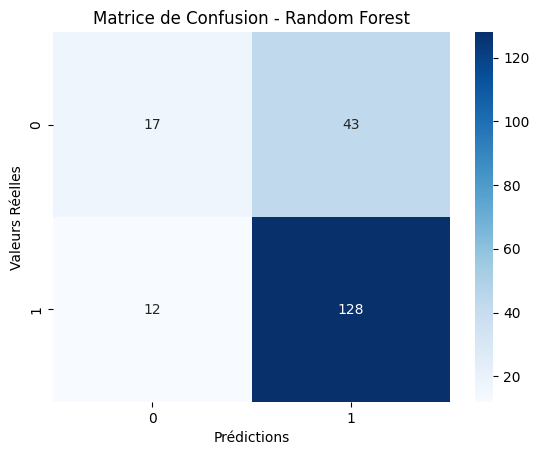

Accuracy : 0.72
Recall : 0.91
F1-score : 0.82

Rapport de classification :
              precision    recall  f1-score   support

           0       0.59      0.28      0.38        60
           1       0.75      0.91      0.82       140

    accuracy                           0.72       200
   macro avg       0.67      0.60      0.60       200
weighted avg       0.70      0.72      0.69       200



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score,recall_score,confusion_matrix,accuracy_score,f1_score

y_pred = model.predict(X_test)


# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))



Avec grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 10, 'n_estimators': 200}


In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

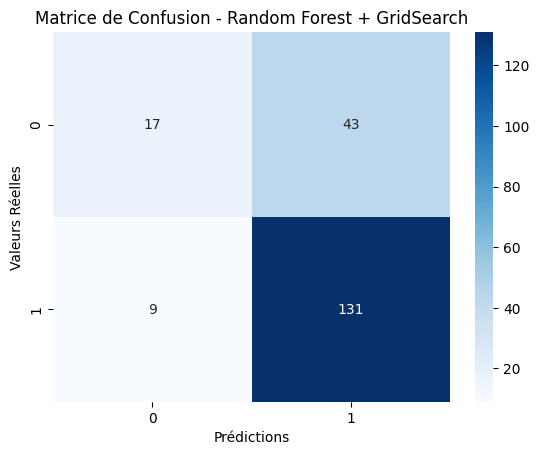

Accuracy : 0.74
Recall : 0.94
F1-score : 0.83

Rapport de classification :
              precision    recall  f1-score   support

           0       0.65      0.28      0.40        60
           1       0.75      0.94      0.83       140

    accuracy                           0.74       200
   macro avg       0.70      0.61      0.61       200
weighted avg       0.72      0.74      0.70       200



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Prédictions du modèle
y_pred = best_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Random Forest + GridSearch")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


### Logistic regression

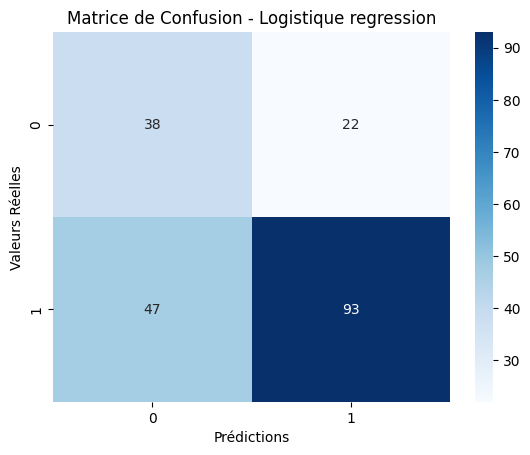

Accuracy : 0.66
Recall : 0.66
F1-score : 0.73

Rapport de classification :
              precision    recall  f1-score   support

           0       0.45      0.63      0.52        60
           1       0.81      0.66      0.73       140

    accuracy                           0.66       200
   macro avg       0.63      0.65      0.63       200
weighted avg       0.70      0.66      0.67       200



In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Logistique regression")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Avec grid search

In [ ]:
# 1. Logistic Regression
print("\n==== Logistic Regression ====")
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_lr, scoring='f1', cv=3
)
grid_search_lr.fit(X_train, y_train)
print("Meilleurs paramètres (Logistic Regression):", grid_search_lr.best_params_)

best_model_lr = grid_search_lr.best_estimator_


==== Logistic Regression ====
Meilleurs paramètres (Logistic Regression): {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


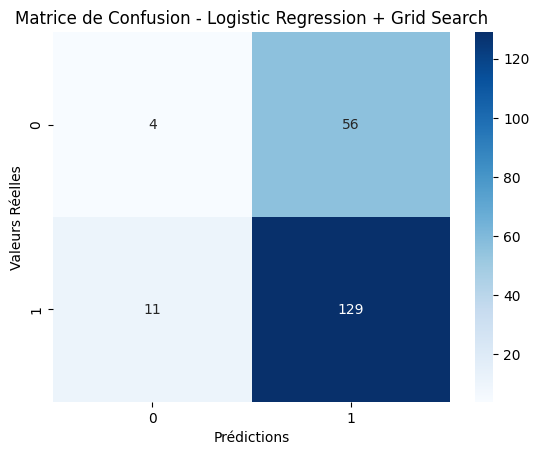

Accuracy : 0.67
Recall : 0.92
F1-score : 0.79

Rapport de classification :
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        60
           1       0.70      0.92      0.79       140

    accuracy                           0.67       200
   macro avg       0.48      0.49      0.45       200
weighted avg       0.57      0.67      0.59       200



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix

# Prédictions du modèle
y_pred = best_model_lr .predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Logistic Regression + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


### SVM

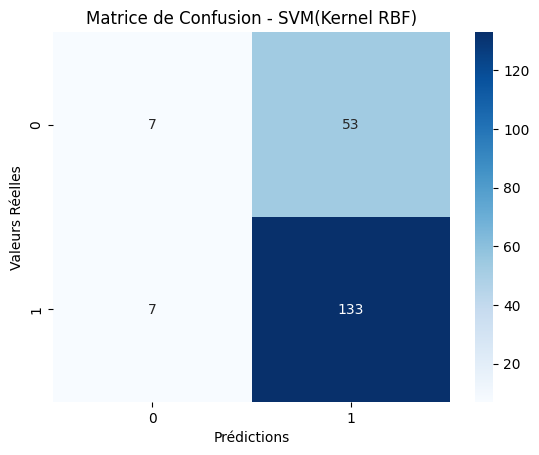

Accuracy : 0.70
Recall : 0.95
F1-score : 0.82

Rapport de classification :
              precision    recall  f1-score   support

           0       0.50      0.12      0.19        60
           1       0.72      0.95      0.82       140

    accuracy                           0.70       200
   macro avg       0.61      0.53      0.50       200
weighted avg       0.65      0.70      0.63       200



In [ ]:
model = SVC(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM(Kernel RBF)")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Avec grid search


==== Support Vector Machine (SVM) ====
Meilleurs paramètres (SVM): {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


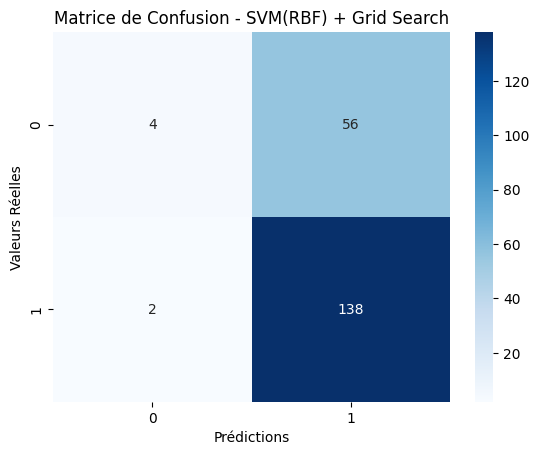

Accuracy : 0.71
Recall : 0.99
F1-score : 0.83

Rapport de classification :
              precision    recall  f1-score   support

           0       0.67      0.07      0.12        60
           1       0.71      0.99      0.83       140

    accuracy                           0.71       200
   macro avg       0.69      0.53      0.47       200
weighted avg       0.70      0.71      0.61       200



In [ ]:
# 2. Support Vector Machine (SVM)
print("\n==== Support Vector Machine (SVM) ====")
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(
    SVC(random_state=42), param_grid_svm, scoring='f1', cv=3
)
grid_search_svm.fit(X_train, y_train)
print("Meilleurs paramètres (SVM):", grid_search_svm.best_params_)

best_model_svm = grid_search_svm.best_estimator_
y_pred= best_model_svm.predict(X_test)



# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM(RBF) + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))



# Reéquilibrage des classes

In [ ]:
### Normalisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
### OverSampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled )


Nombre d'itérations par catégorie :
   Category  Counts
0         1     700
1         0     700


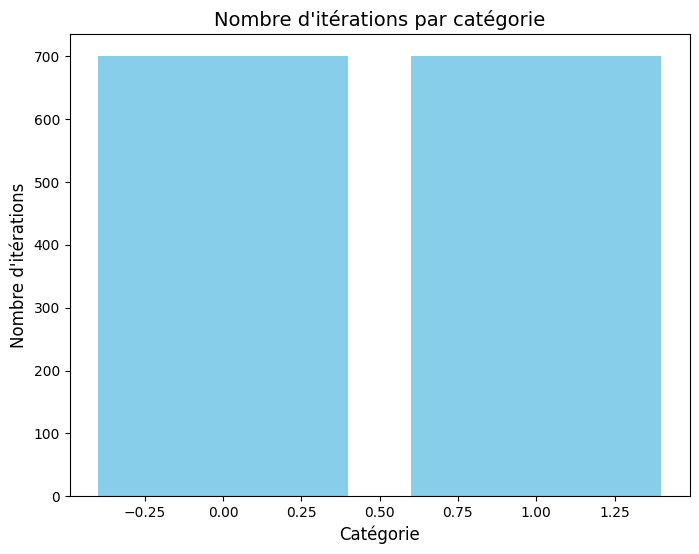

In [ ]:

# Calcul du nombre d'itérations (fréquence) par catégorie
risk_counts = y_resampled.value_counts().reset_index()
risk_counts.columns = ['Category', 'Counts']

# Affichage des résultats
print("Nombre d'itérations par catégorie :")
print(risk_counts)

# Visualisation
plt.figure(figsize=(8, 6))
plt.bar(risk_counts['Category'], risk_counts['Counts'], color='skyblue')
plt.title('Nombre d\'itérations par catégorie', fontsize=14)
plt.xlabel('Catégorie', fontsize=12)
plt.ylabel('Nombre d\'itérations', fontsize=12)
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

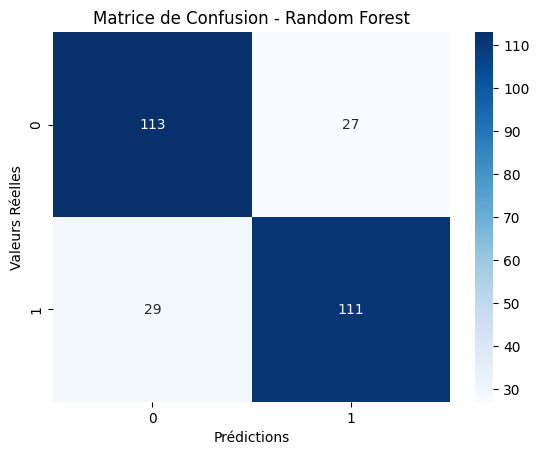

Accuracy : 0.80
Recall : 0.79
F1-score : 0.80

Rapport de classification :
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       140
           1       0.80      0.79      0.80       140

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.80      0.80      0.80       280



In [ ]:
# Prédictions
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics importantes
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Avec Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1', cv=3)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

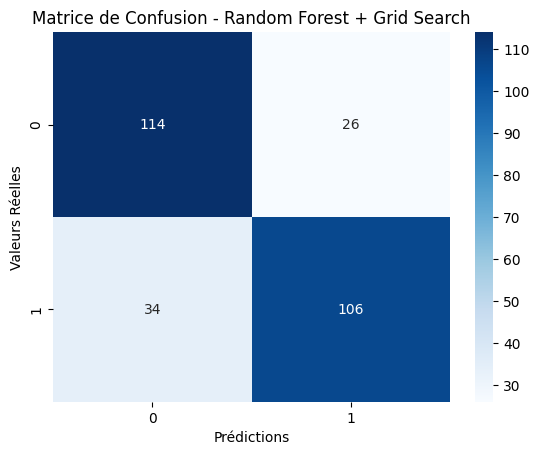

Accuracy : 0.79
Recall : 0.76
F1-score : 0.78

Rapport de classification :
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       140
           1       0.80      0.76      0.78       140

    accuracy                           0.79       280
   macro avg       0.79      0.79      0.79       280
weighted avg       0.79      0.79      0.79       280



In [ ]:
y_pred = best_model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Random Forest + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


# Regression Logistique

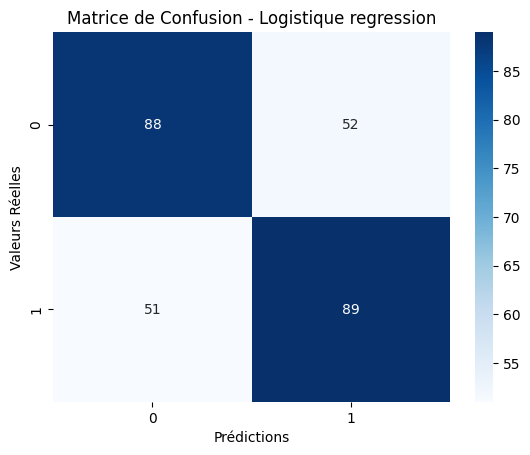

Accuracy : 0.63
Recall : 0.64
F1-score : 0.63

Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       140
           1       0.63      0.64      0.63       140

    accuracy                           0.63       280
   macro avg       0.63      0.63      0.63       280
weighted avg       0.63      0.63      0.63       280



In [ ]:
model = LogisticRegression(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Logistique regression")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Avec Grid Search



==== Logistic Regression ====
Meilleurs paramètres (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


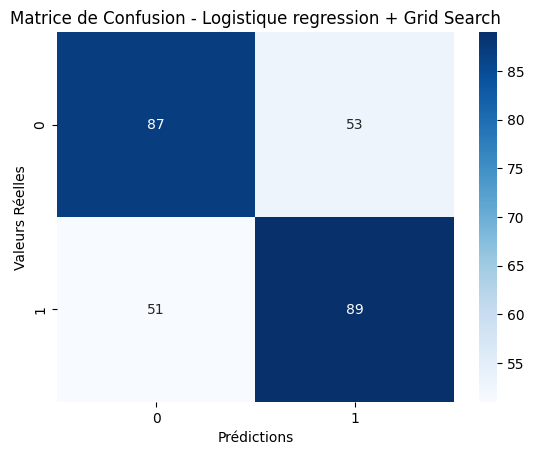

Accuracy : 0.63
Recall : 0.64
F1-score : 0.63

Rapport de classification :
              precision    recall  f1-score   support

           0       0.63      0.62      0.63       140
           1       0.63      0.64      0.63       140

    accuracy                           0.63       280
   macro avg       0.63      0.63      0.63       280
weighted avg       0.63      0.63      0.63       280



In [ ]:
# 1. Logistic Regression
print("\n==== Logistic Regression ====")
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42), param_grid_lr, scoring='f1', cv=3
)
grid_search_lr.fit(X_train, y_train)
print("Meilleurs paramètres (Logistic Regression):", grid_search_lr.best_params_)

best_model_lr = grid_search_lr.best_estimator_
y_pred = best_model_lr.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Logistique regression + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


# SVM

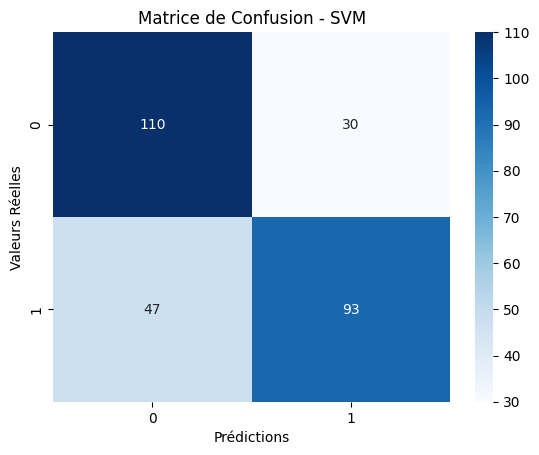

Accuracy : 0.72
Recall : 0.66
F1-score : 0.71

Rapport de classification :
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       140
           1       0.76      0.66      0.71       140

    accuracy                           0.72       280
   macro avg       0.73      0.72      0.72       280
weighted avg       0.73      0.72      0.72       280



In [ ]:
model = SVC(random_state=42)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Avec Grid Search


==== Support Vector Machine (SVM) ====
Meilleurs paramètres (SVM): {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


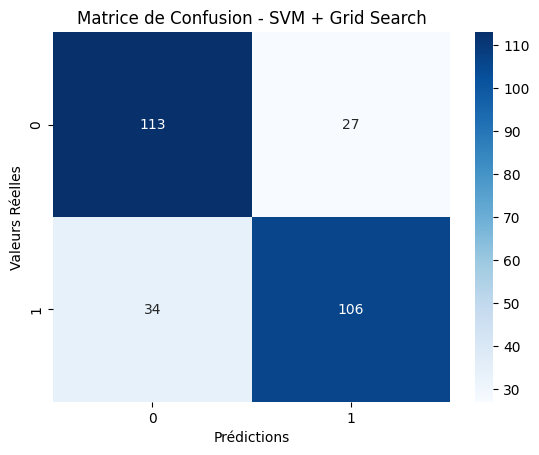

Accuracy : 0.78
Recall : 0.76
F1-score : 0.78

Rapport de classification :
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       140
           1       0.80      0.76      0.78       140

    accuracy                           0.78       280
   macro avg       0.78      0.78      0.78       280
weighted avg       0.78      0.78      0.78       280



In [ ]:
print("\n==== Support Vector Machine (SVM) ====")
param_grid_svm = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
grid_search_svm = GridSearchCV(
    SVC(random_state=42), param_grid_svm, scoring='f1', cv=3
)
grid_search_svm.fit(X_train, y_train)
print("Meilleurs paramètres (SVM):", grid_search_svm.best_params_)

best_model_svm = grid_search_svm.best_estimator_
y_pred = best_model_svm.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - SVM + Grid Search")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-score : {f1:.2f}")


# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


# Comparaison des modèles

#### Avant reéquilibre des classes

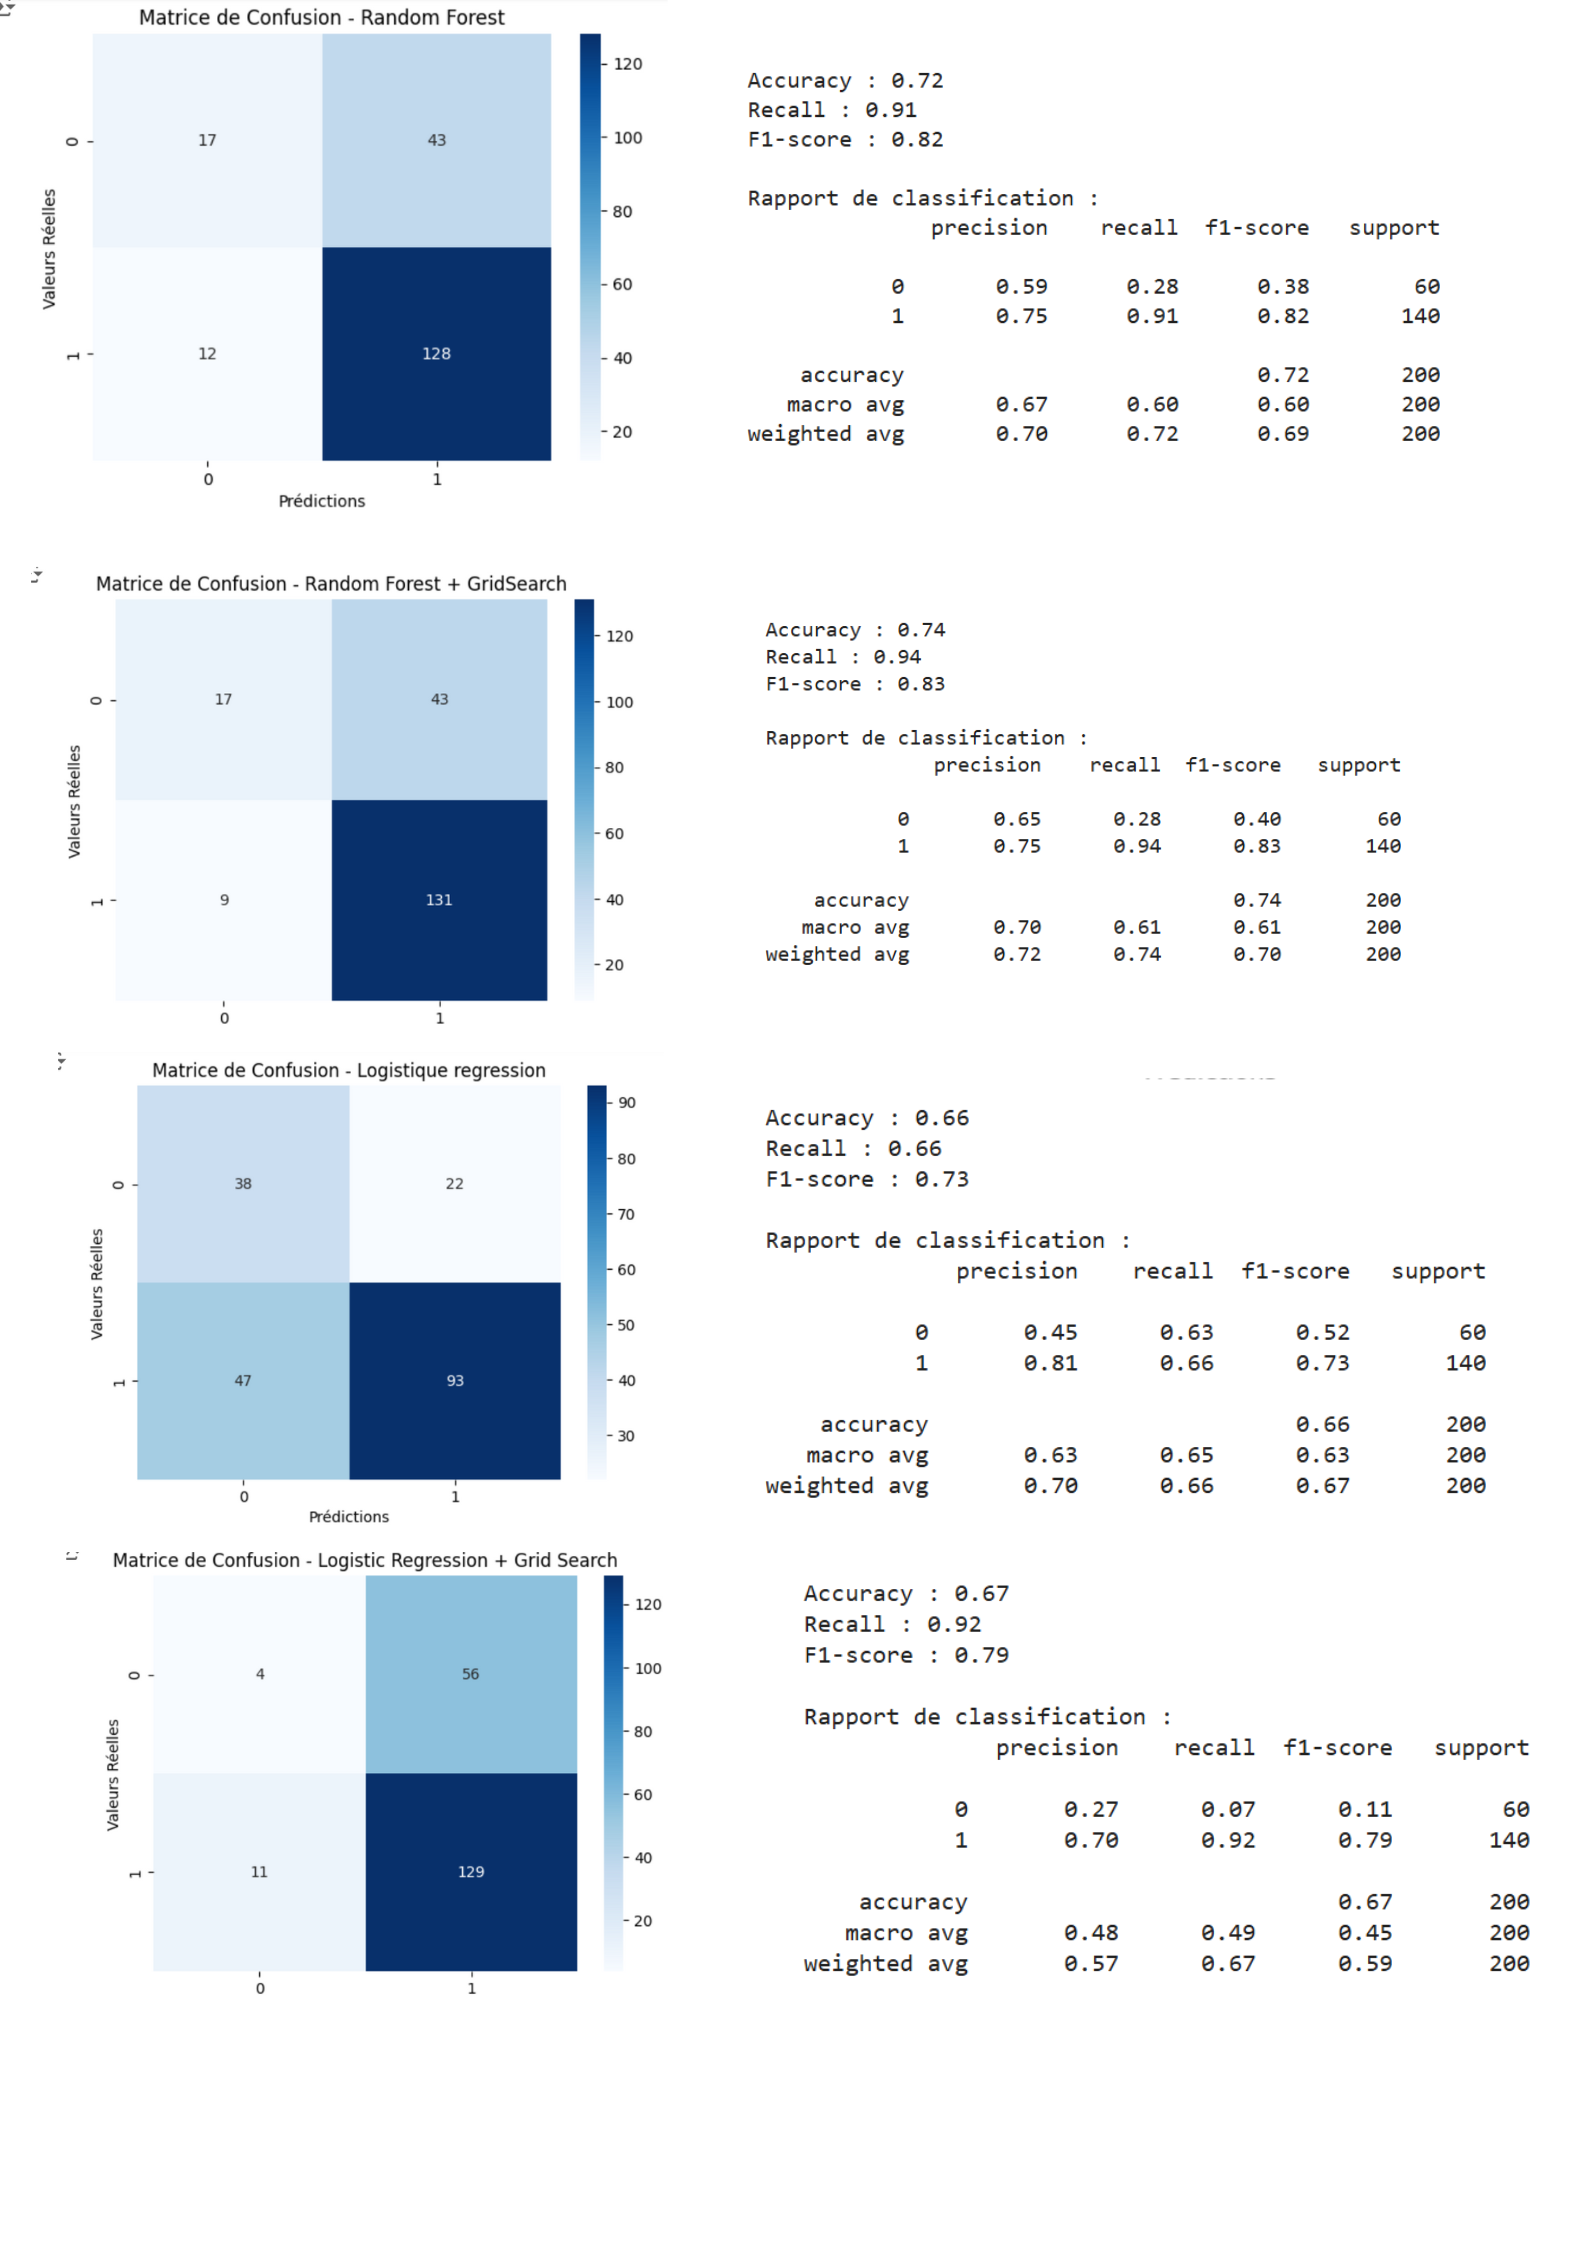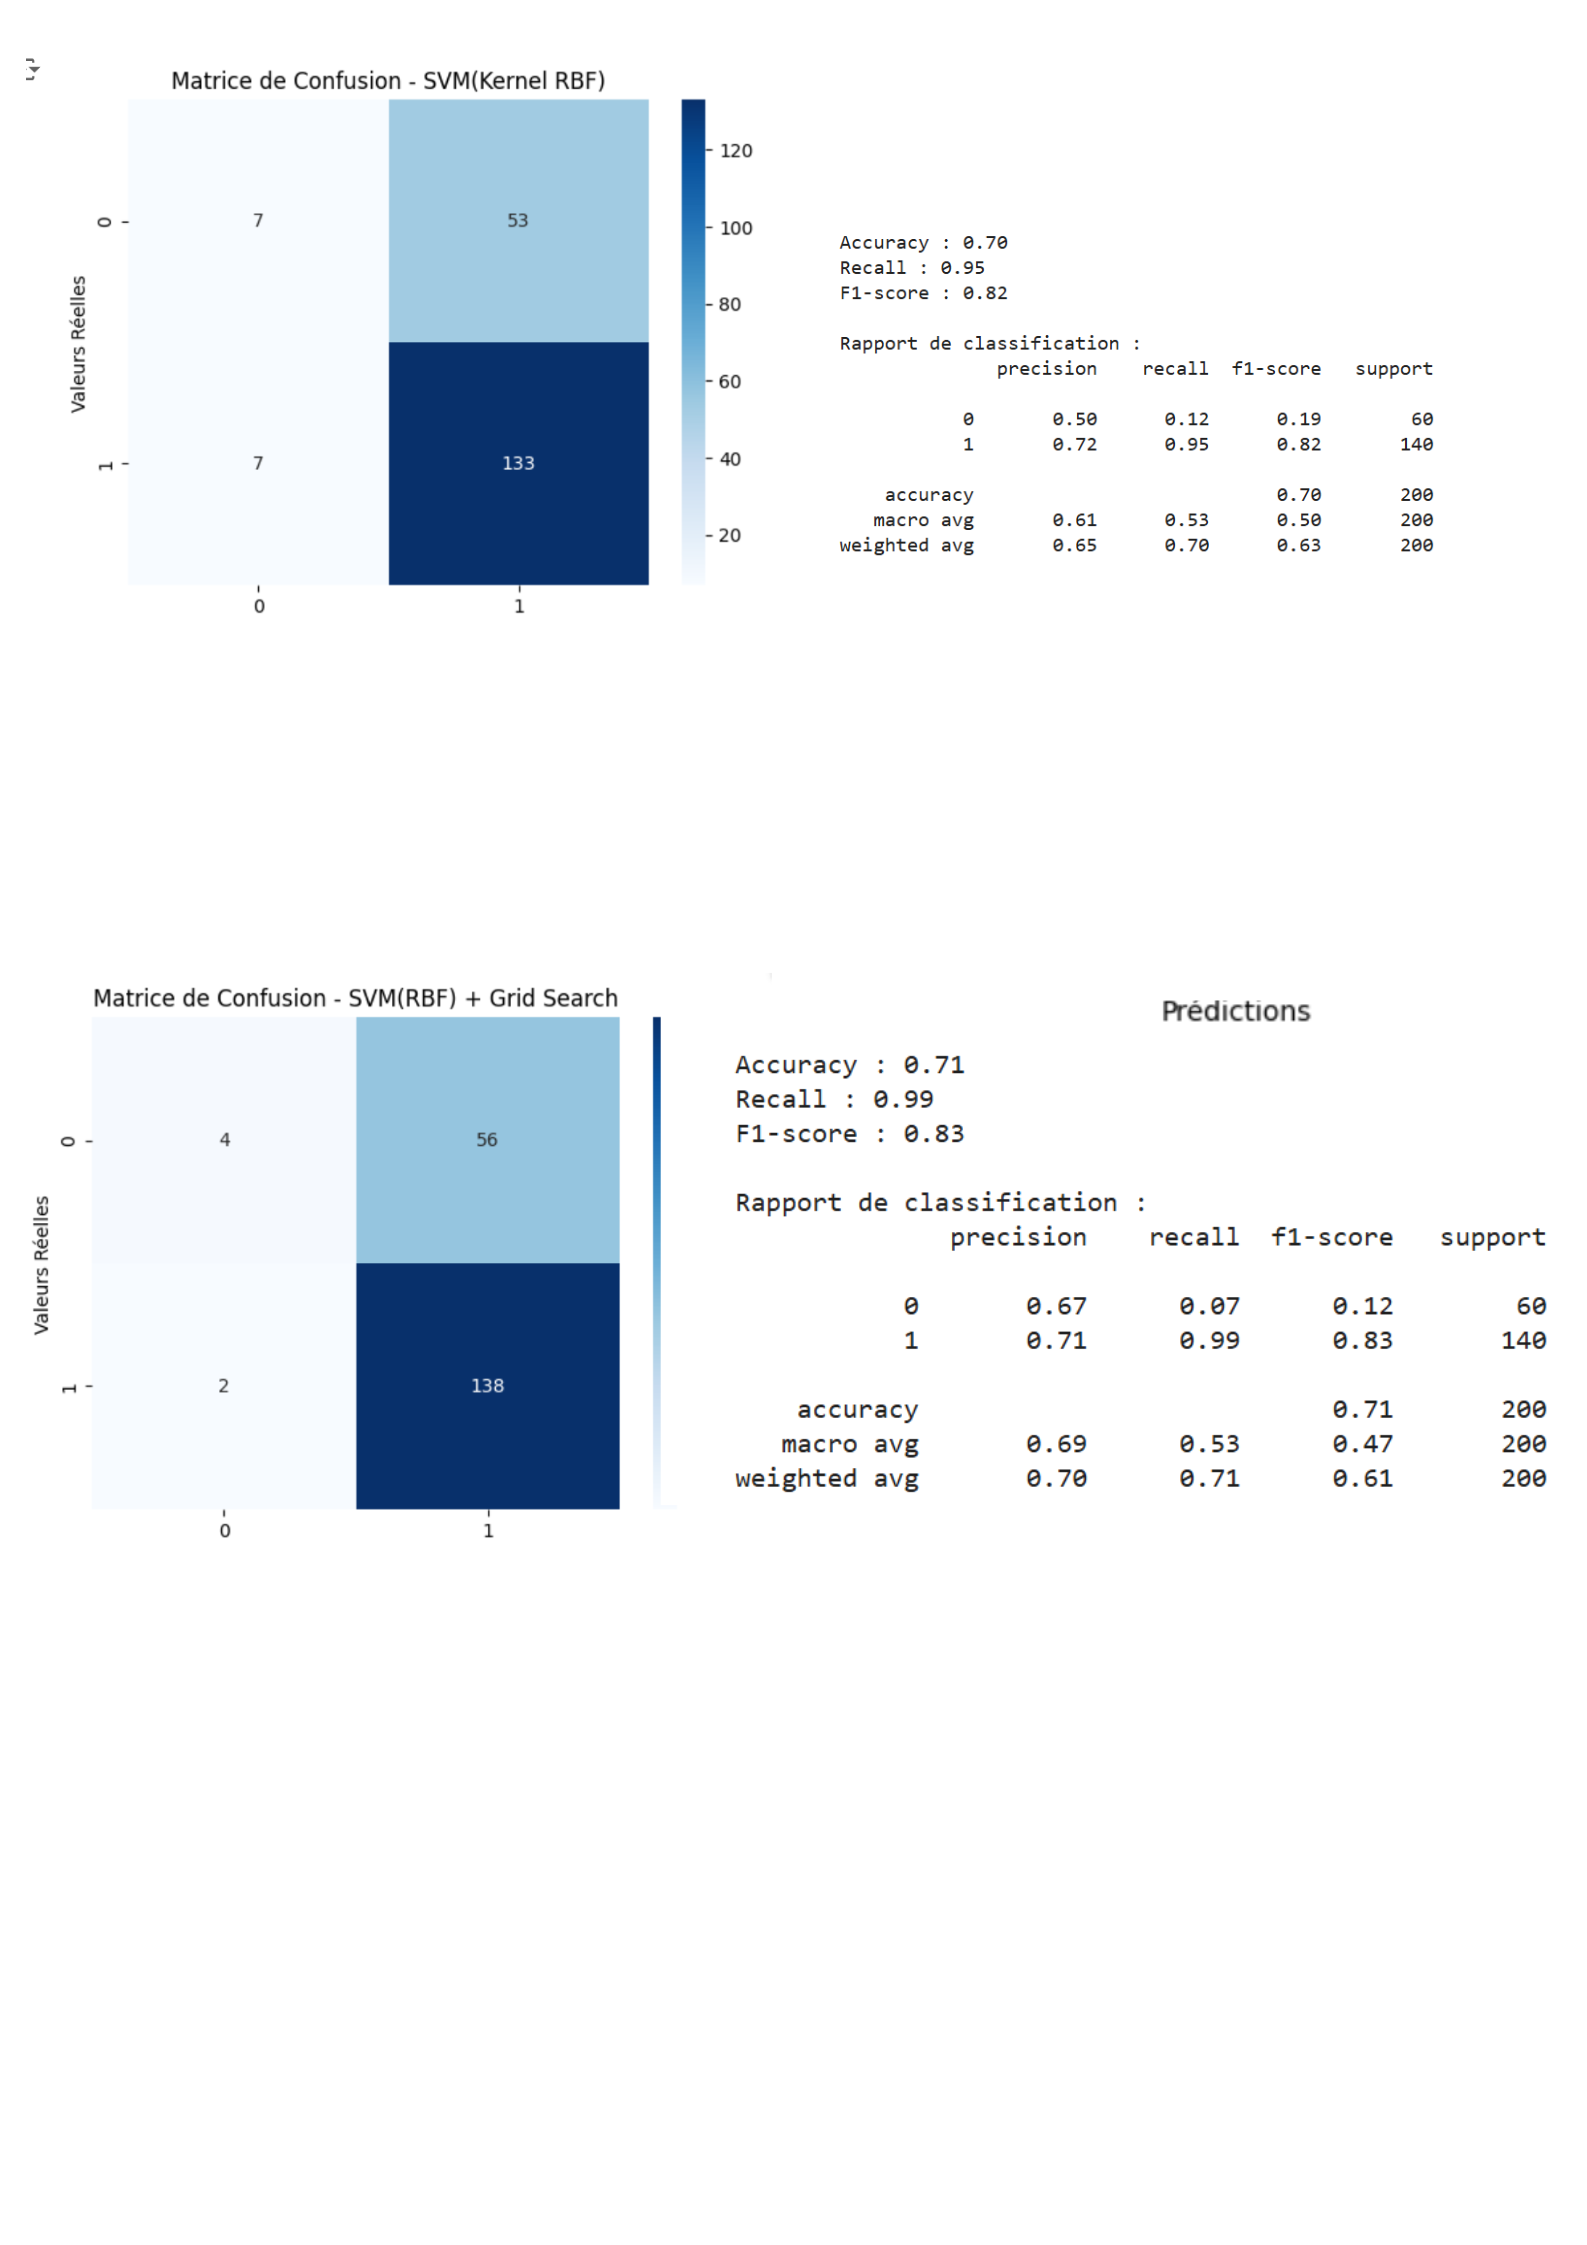

### **Interpretation**
Des 3 modèles utilisés, Le random forest avec application du grid search presente un meilleur score au niveau de l'accuracy et du F1 score.

L'application du grid Search permettrait donc une amélioration des différents scores

Cependant, au niveau de l'evaluation par classe, nous constatons des métrics assez Bas surtout au niveau de la classe 0 (mauvais risque).
Cela peut être du au desequilibre des differentes classes(la classe 0 est minoritaire).
D'ou notre volonté d'effectuer un reequilibre.

### Après reéquilibrage

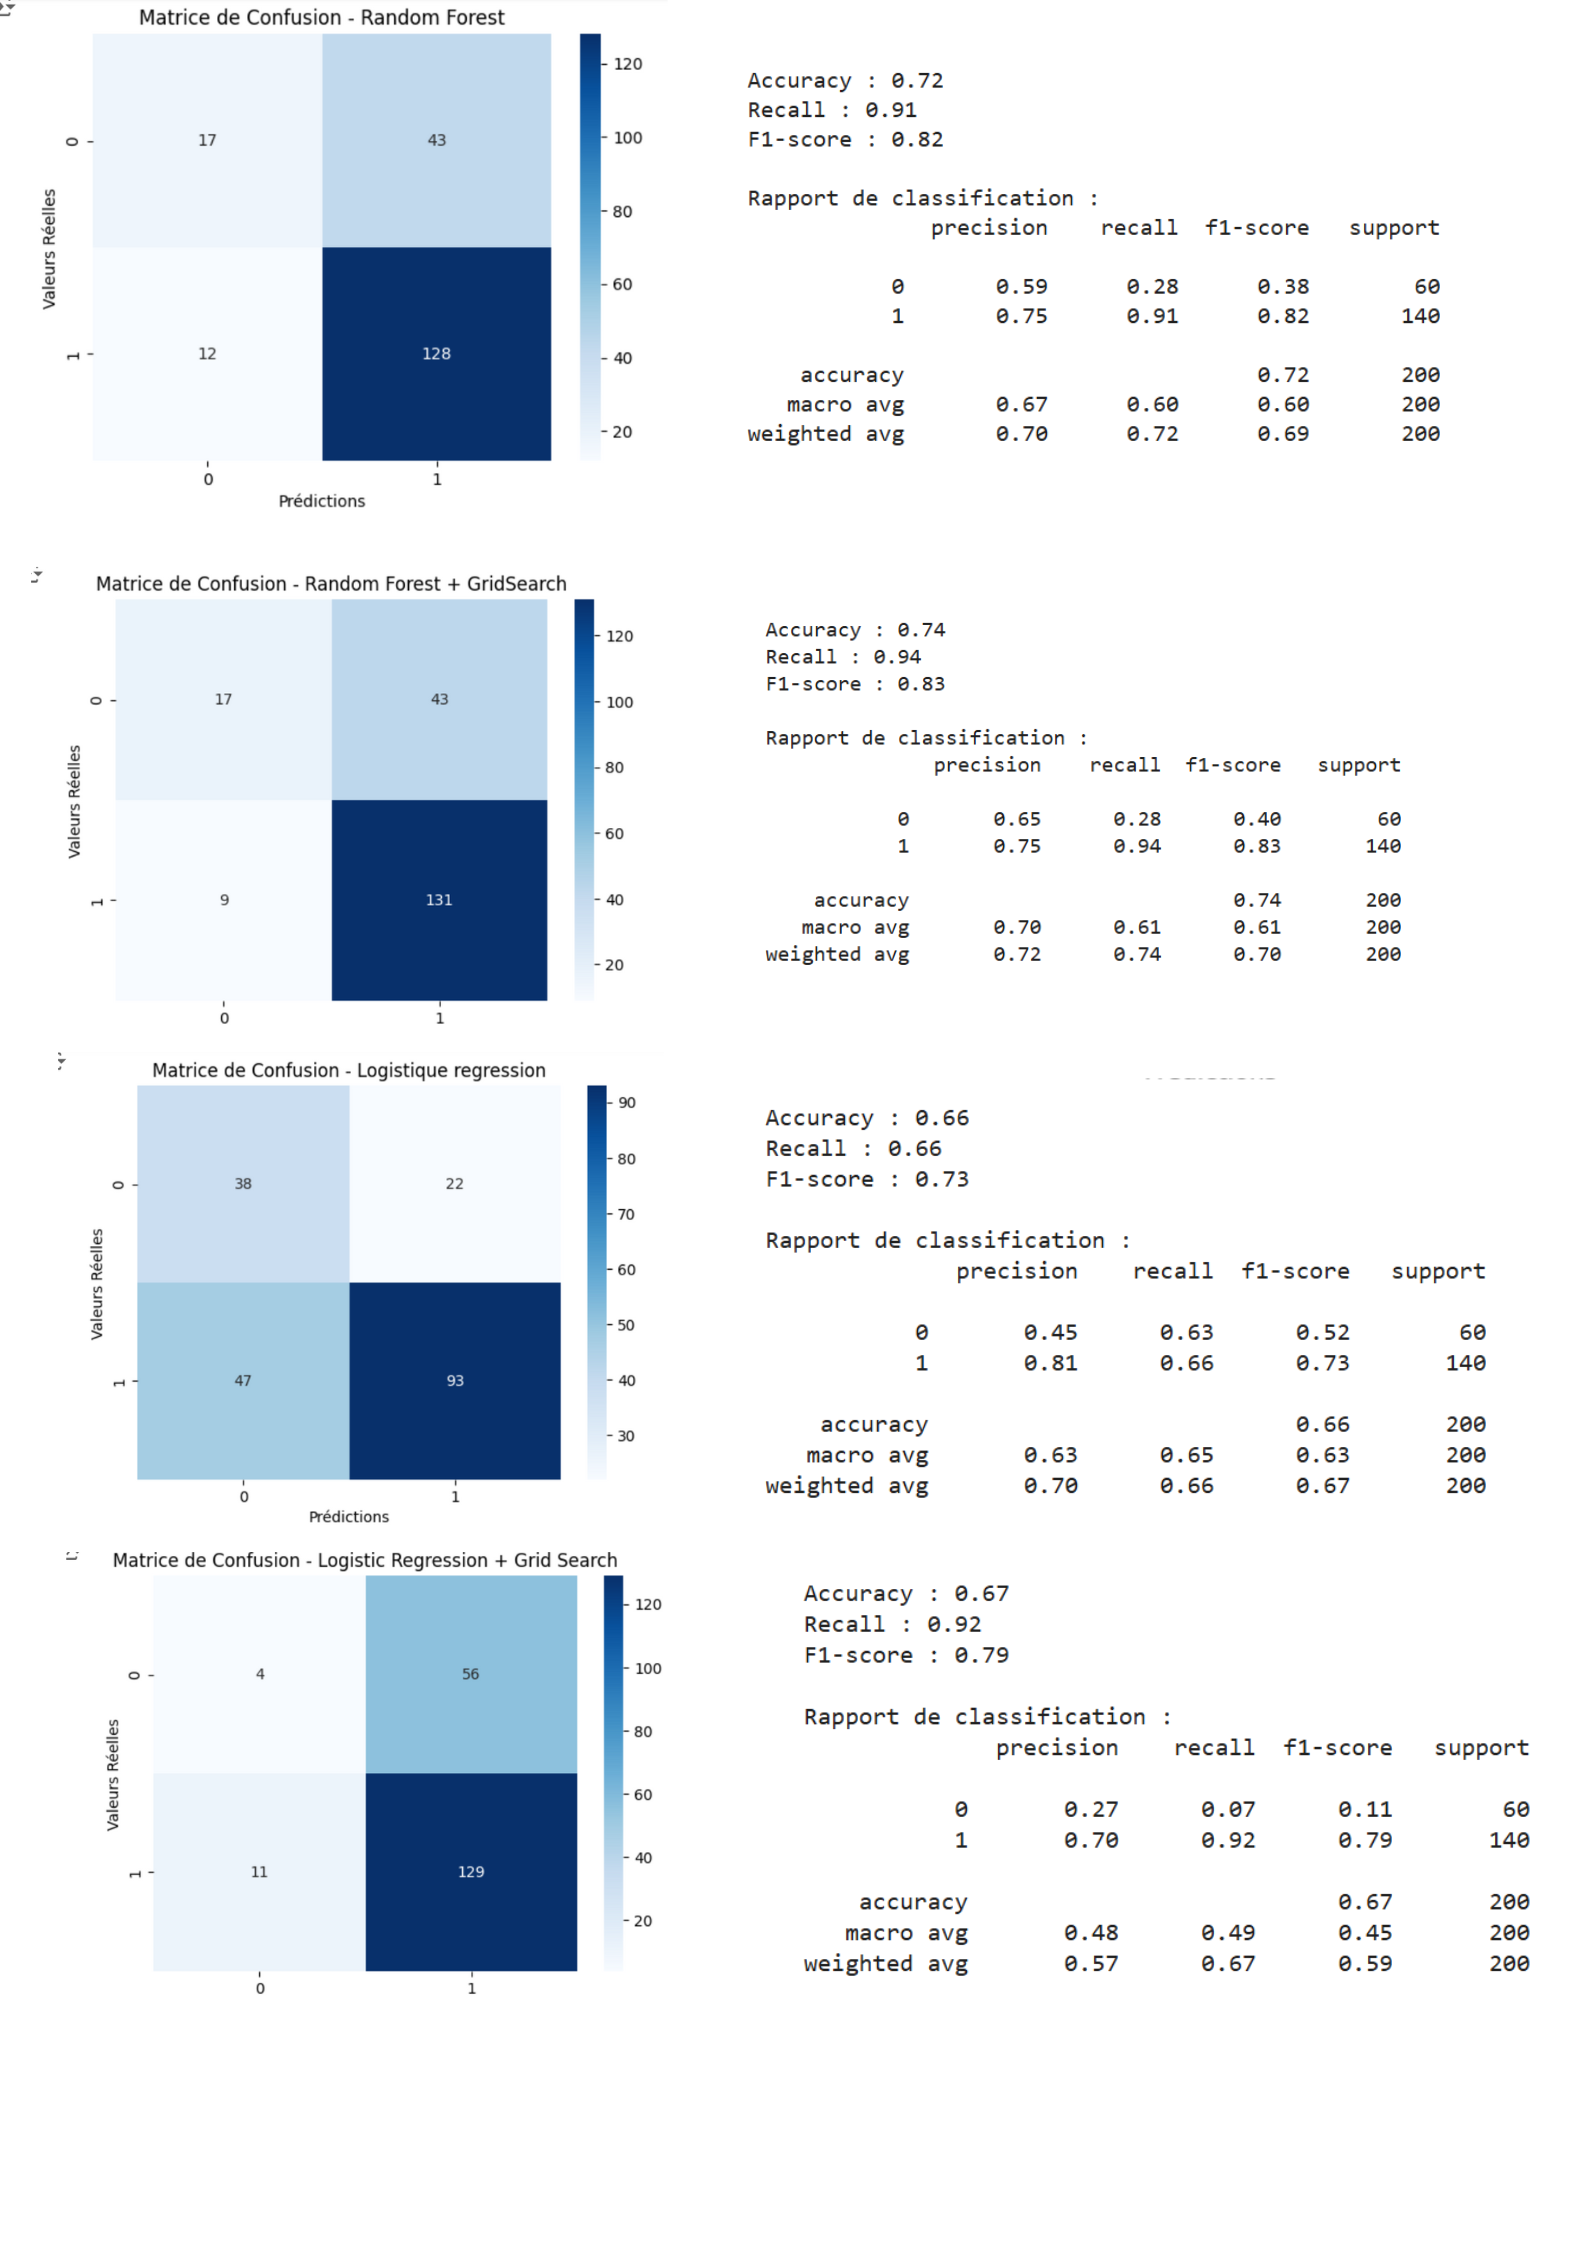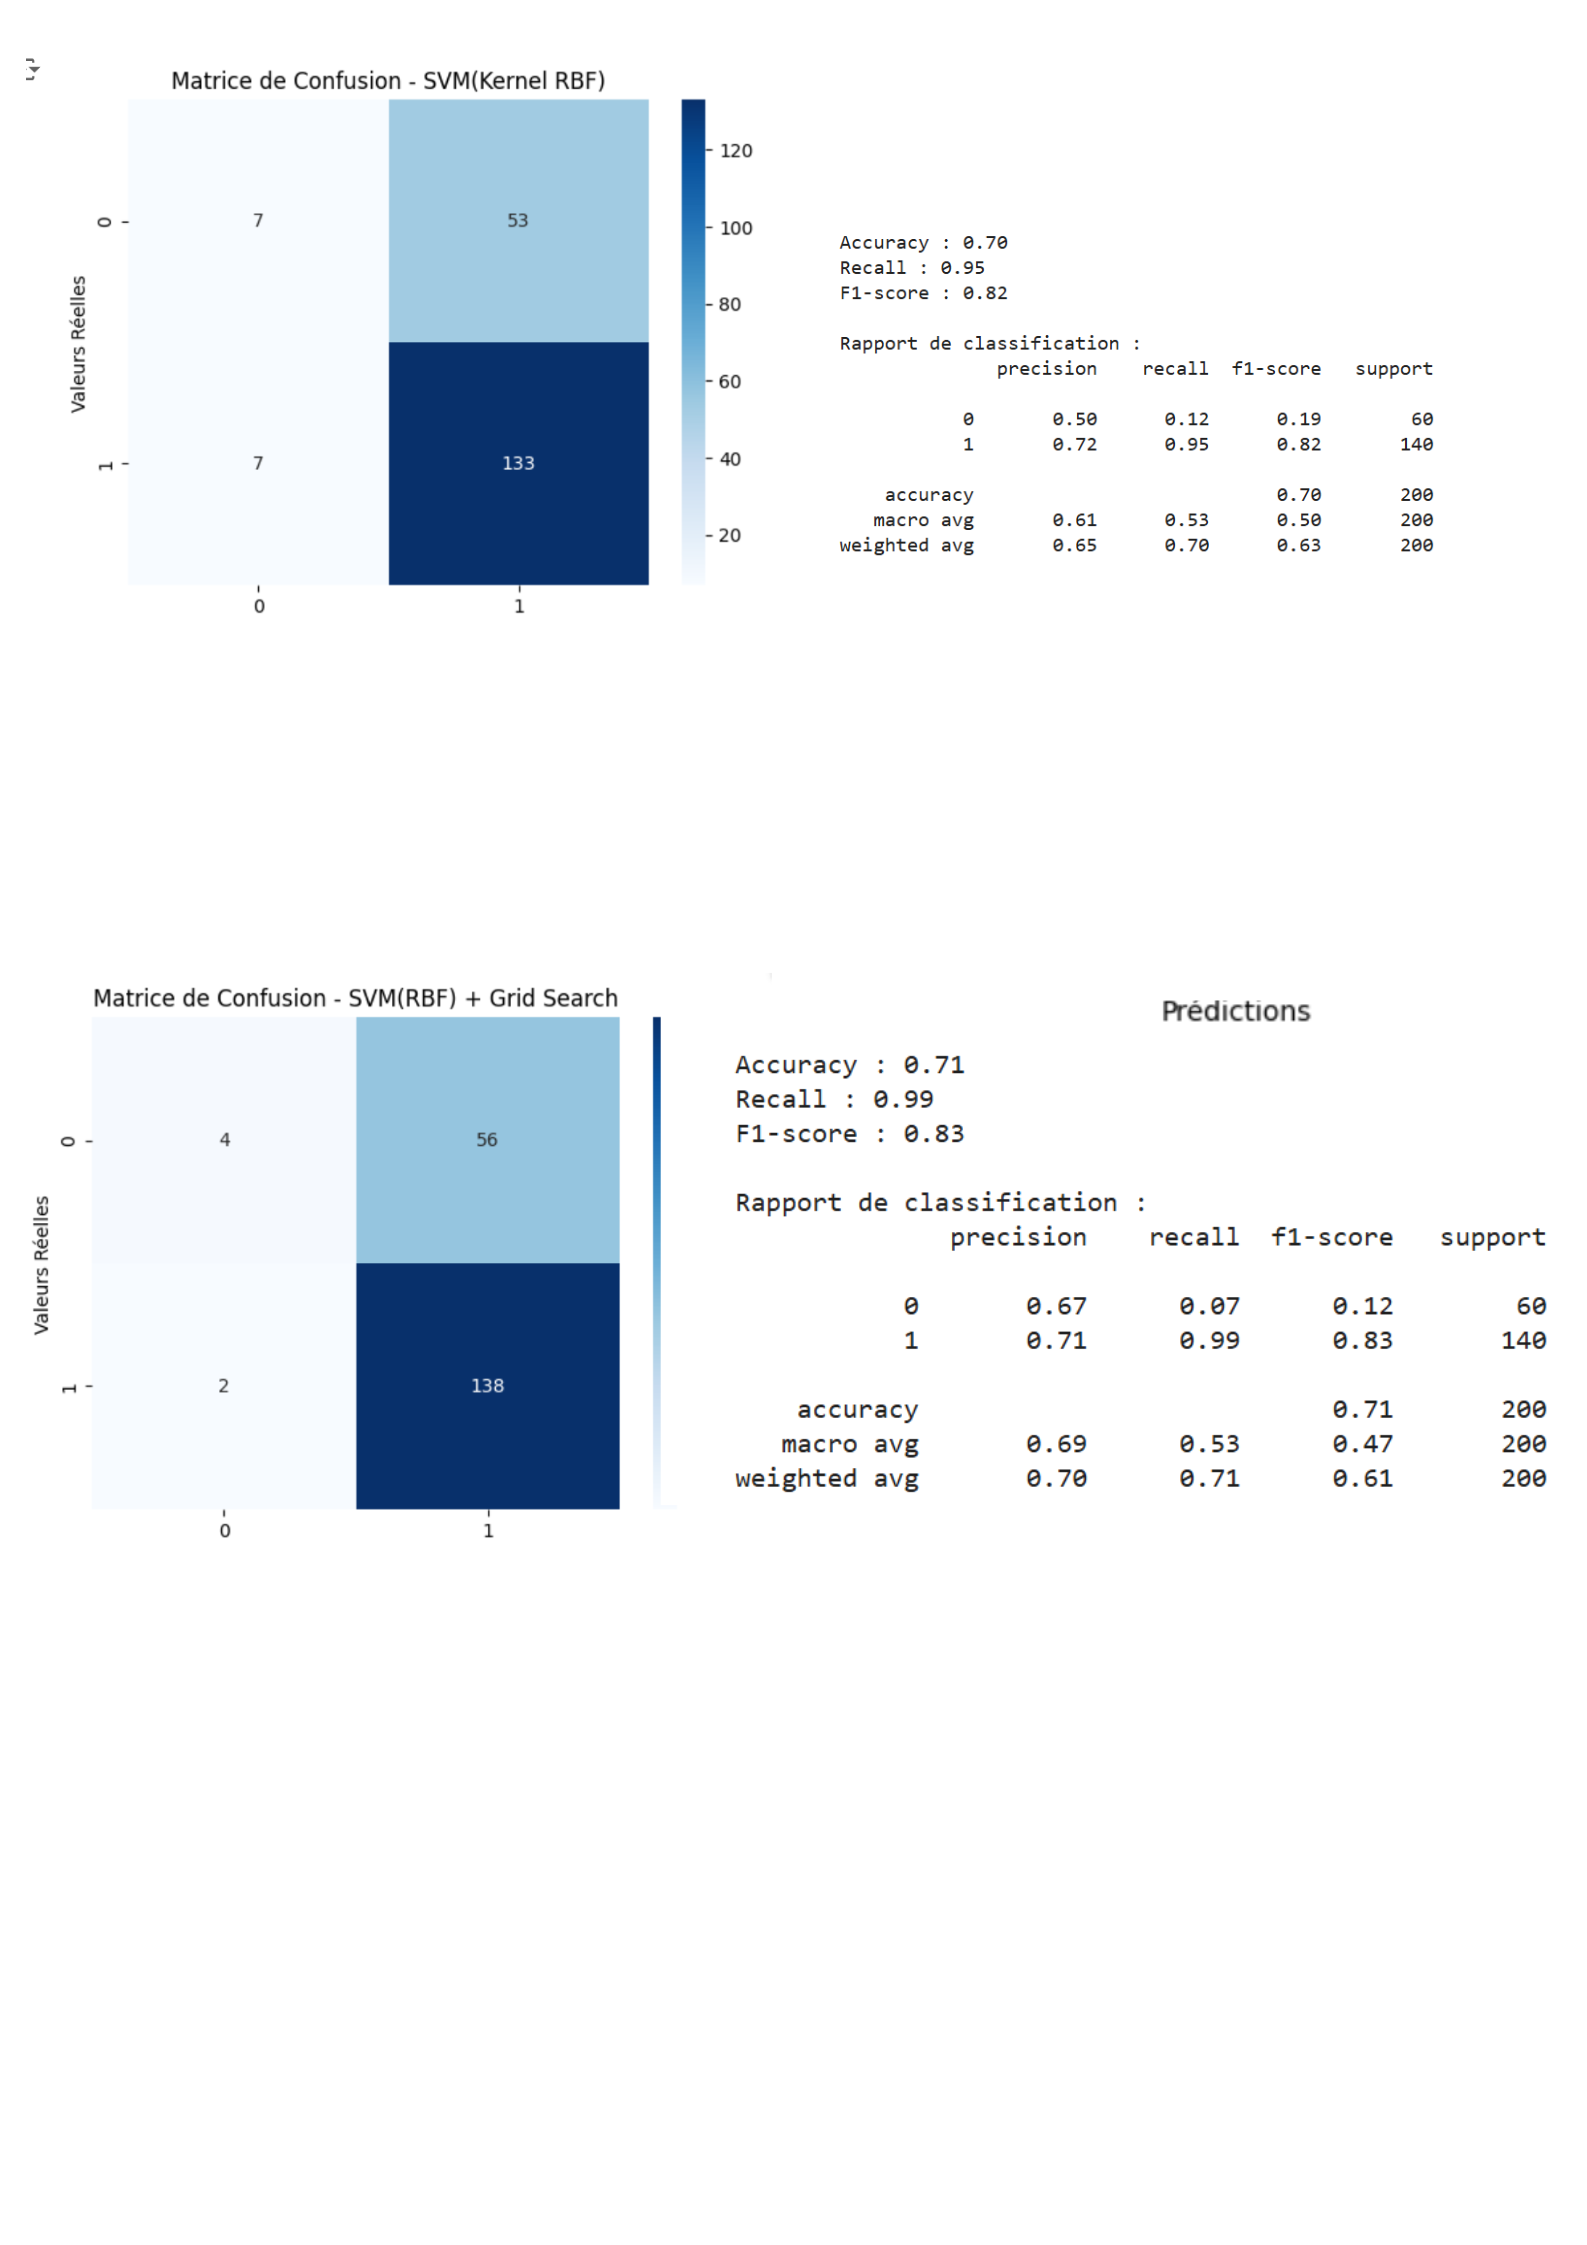

### **Interprétation:**
Après le réequilibrage avec une méThode de oversampling, nous remarquons une nette amélioration des scores aussi bien de manière globale, que le score par classe.
Cependant, le grid search n'apporte plus d'amélioration.

Cela pourrait être du au fait que après le reéquilibrage,le modèle serait déjà bien optimisé et performant, et aucun ajustement supplémentaire des hyperparamètres via Grid Search ne pourra améliorer les résultats de manière significative.

Le modèle qui présente les meilleur score après rééquilibrage est le Random Forest.